In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer 
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import pickle
from sklearn import metrics

loading two datasets fake and true

In [2]:
df_fake = pd.read_csv("/home/darshan/Desktop/fakend/docs/Fake.csv")
df_fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
df_true = pd.read_csv("/home/darshan/Desktop/fakend/docs/True.csv")
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


check shape of datasets

In [4]:
df_fake.shape

(23481, 4)

In [5]:
df_true.shape

(21417, 4)

check whether any value in a cell is empty or not

In [6]:
df_true.isnull().values.any()

False

In [7]:
df_fake.isnull().values.any()

False

# Assign binary class labels to fake news and true news

In [8]:
df_fake["class"] = 0
df_true["class"] = 1

# Split the two datasets into training data and manual testing data

In [9]:
df_fake_testing_data = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)

In [10]:
df_true_testing_data = df_true.tail(10)
for i in range(21416, 21417, -1):
    df_true.drop([i], axis = 0, inplace = True)

In [11]:
df_fake_testing_data

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
df_true_testing_data

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


# Label the manual testing data

In [13]:
df_fake_testing_data["class"] = 0
df_true_testing_data["class"] = 1

/tmp/ipykernel_17357/2169562288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_testing_data["class"] = 0
/tmp/ipykernel_17357/2169562288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_testing_data["class"] = 1


# Concatenate the two manual testing data sets into one


In [14]:
df_manual_testing = pd.concat([df_fake_testing_data, df_true_testing_data], axis = 0)


In [15]:
df_manual_testing

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


# Save the manual testing data set to csv file


In [16]:
df_manual_testing.to_csv("manual_testing_data.csv")


# Concatenate the two training data sets into one


In [17]:
df_merge = pd.concat([df_fake, df_true], axis =0 )


# Drop the title, subject, and date columns


In [18]:
df = df_merge.drop(["title", "subject","date"], axis = 1)


In [19]:
 #Check for missing values
df.isnull().sum()


text     0
class    0
dtype: int64

In [20]:
# Shuffle the rows of the dataframe
df = df.sample(frac = 1)

In [21]:
# Reset the index
df.reset_index(inplace = True)

In [22]:
# Drop the index column
df.drop(["index"], axis = 1, inplace = True)

In [23]:
df.shape

(44888, 2)

In [24]:
df


,text,class
0,SYDNEY (Reuters) - Australia will end air stri...,1
1,"NUEVO LAREDO, Mexico (Reuters) - Glafiro Monte...",1
2,WASHINGTON/NEW YORK (Reuters) - President Dona...,1
3,Enjoy:,0
4,"Despite the racial outbursts, the insistence t...",0
...,...,...
44883,BERLIN (Reuters) - A dispute between the Spani...,1
44884,MOSCOW (Reuters) - Russia’s foreign minister S...,1
44885,More information about Donald Trump s Russian ...,0
44886,WASHINGTON (Reuters) - A former U.S. National ...,1


### Data  preprocessing
# Define a function to preprocess the text data


In [25]:
def wordopt(text):
    # Lowercase the text
    text = text.lower()
    # # Remove any text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # Remove any non-word characters
    text = re.sub("\\W"," ",text) 
    # Remove any URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Remove any HTML tags
    text = re.sub('<.*?>+', '', text)
    # Remove any punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove any line breaks
    text = re.sub('\n', '', text)
    # Remove any words containing numbers
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [26]:
#before appyling data-preprocessing
df["text"]

0        SYDNEY (Reuters) - Australia will end air stri...
1        NUEVO LAREDO, Mexico (Reuters) - Glafiro Monte...
2        WASHINGTON/NEW YORK (Reuters) - President Dona...
3                                                   Enjoy:
4        Despite the racial outbursts, the insistence t...
                               ...                        
44883    BERLIN (Reuters) - A dispute between the Spani...
44884    MOSCOW (Reuters) - Russia’s foreign minister S...
44885    More information about Donald Trump s Russian ...
44886    WASHINGTON (Reuters) - A former U.S. National ...
44887    While giving a speech at a church rally in Cle...
Name: text, Length: 44888, dtype: object

 Add the word optimization to the text column in the dataframe


In [27]:
df["text"] = df["text"].apply(wordopt)


In [28]:
#after data pre-processing
df["text"]

0        sydney  reuters    australia will end air stri...
1        nuevo laredo  mexico  reuters    glafiro monte...
2        washington new york  reuters    president dona...
3                                                   enjoy 
4        despite the racial outbursts  the insistence t...
                               ...                        
44883    berlin  reuters    a dispute between the spani...
44884    moscow  reuters    russia s foreign minister s...
44885    more information about donald trump s russian ...
44886    washington  reuters    a former u s  national ...
44887    while giving a speech at a church rally in cle...
Name: text, Length: 44888, dtype: object

In [29]:
# Store the text and class columns as x and y respectively
x = df["text"]
y = df["class"]

# Split the data into training and testing sets


In [30]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [31]:
from sklearn.model_selection import train_test_split

x_Train , x_Test, y_Train, y_Test = train_test_split (x,y,test_size=0.33, random_state = 40)

print("Number of train dataset      : ", len(x_Train))
print("Number of test dataset       : ", len(x_Test))
print("Total number of transactions : ", len(x_Train) + len(x_Test))



Number of train dataset      :  30074
Number of test dataset       :  14814
Total number of transactions :  44888


# # Use TfidfVectorizer to vectorize the training and testing data


In [32]:

# Use TfidfVectorizer to vectorize the text data
vectorization = TfidfVectorizer()
xv = vectorization.fit_transform(x)

# Vectorize the training and testing data
xv_train = xv[:len(x_train)]
xv_test = xv[len(x_train):len(x_train)+len(x_test)]

# Vectorize the manual testing data
xv_manual_test = xv[-len(df_manual_testing):]

# Initialize the Linear Regression model
DT = LinearRegression()

# Fit the model on the training data
DT.fit(xv_train, y_train)

# Make predictions on the manual testing data
pred_dt = DT.predict(xv_manual_test)

# # Generate a confusion matrix for the manual testing data
# cm = confusion_matrix(df_manual_testing["class"], pred_manual_test.round())

# print(cm)


define and use the classifier

In [33]:
from sklearn.metrics import accuracy_score,roc_auc_score,precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [34]:
# Predict class for the vectorized test data
# pred_dt = DT.predict(xv_manual_test)

average_precision = average_precision_score(y_test,pred_dt)

precision , recall, _ = precision_recall_curve(y_test,pred_dt)
plot_pr_curve(recall, precision, average_precision)

ValueError: Found input variables with inconsistent numbers of samples: [14814, 20]

In [35]:
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

plot_pr_curve(recall, precision, average_precision)

NameError: name 'recall' is not defined

In [36]:
# Predict class for the vectorized test data
pred_dt = DT.predict(xv_manual_test)

average_precision = average_precision_score(y_test,pred_dt)

precision , recall, _ = precision_recall_curve(y_test,pred_dt)
plot_pr_curve(recall, precision, average_precision)

ValueError: Found input variables with inconsistent numbers of samples: [14814, 20]

In [37]:
# Calculate accuracy score for the test data
accuracy = DT.score(xv_test, y_test)
print(f"Accuracy score: {accuracy:.2f}")

Accuracy score: -2.87


In [38]:

# Generate a confusion matrix for the manual testing data
cm = confusion_matrix(df_manual_testing["class"], pred_dt.round())

print(cm)


[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 4 2 1 1]
 [2 1 2 4 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [39]:
LABELS = ["True", "Fraud"]

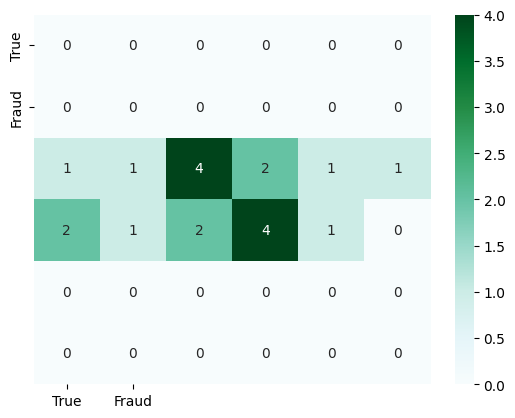

In [40]:
import seaborn as sns
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap=plt.cm.BuGn);

In [41]:
# Generate classification report for the test data
report = classification_report(y_test, pred_dt)
print(report)

ValueError: Found input variables with inconsistent numbers of samples: [14814, 20]